# The MNIST Database

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%.

### Getting Started
Import gzip and unzip the zipped files

In [1]:
#Adapted from https://docs.python.org/3/library/gzip.html
import gzip
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

## Big Endian & Little Endian
This illustrates how the data is composed 
![title](img/label.png)

#### Big Endian Byte Order: 
The most significant byte (the "big end") of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory.

#### Little Endian Byte Order: 
The least significant byte (the "little end") of the data is placed at the byte with the lowest address. The rest of the data is placed in order in the next three bytes in memory.

In [2]:
type(file_content) ## file type

bytes

In [3]:
file_content[0:4] 

b'\x00\x00\x08\x03'

In [4]:
int.from_bytes(file_content[0:4], byteorder= 'big') ## magic number

2051

In [5]:
int.from_bytes(file_content[4:8], byteorder= 'big') ## number of items

60000

In [6]:
int.from_bytes(file_content[8:12], byteorder= 'big') ## pixel size rows

28

In [2]:
int.from_bytes(file_content[12:16], byteorder= 'big') ## pixel size columns

28

### Reshape the bits into a 28 x 28 array using the numpy package

In [8]:
import numpy as np ## imports the numpy package

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8) ## reshapes the list into  28*28

### We will use matplotlib to display the images

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt ## imports the matplotlib package

### Displaying the first image
The image resembles the number five

In [6]:
plt.imshow(image, cmap='gray')## display the image

NameError: name 'image' is not defined

### Displaying the second image

In [11]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8) ## 800+784 = 1584

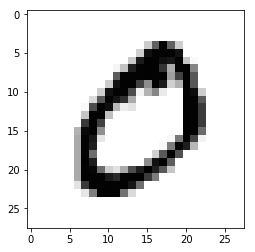

In [12]:
plt.imshow(image, cmap='gray')

### Reading in the label files

In [13]:
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f: 
    labels = f.read()

In [14]:
int.from_bytes(labels[4:8], byteorder="big")

60000

### The first label should be 5

In [15]:
label = int.from_bytes(labels[8:9], byteorder="big") 
print(str(label))

5


### The second label should be 0

In [16]:
label = int.from_bytes(labels[9:10], byteorder="big") 
print(str(label))

0


## Creating the neural network

In [24]:
# Import keras.
import keras as kr

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))





# Add a 10 neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

In [19]:
inputs = train_img.reshape(60000, 784)/255

In [20]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


In [21]:
model.fit(inputs, outputs, epochs=15, batch_size=100)

Epoch 1/15
60000/60000 [==============================] - 68s 1ms/step - loss: 0.8977 - acc: 0.7486
Epoch 2/15
60000/60000 [==============================] - 67s 1ms/step - loss: 0.3861 - acc: 0.8834
Epoch 3/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3177 - acc: 0.9034
Epoch 4/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2775 - acc: 0.9160
Epoch 5/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2466 - acc: 0.9254
Epoch 6/15
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2250 - acc: 0.9321: 3
Epoch 7/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2058 - acc: 0.9384
Epoch 8/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1897 - acc: 0.9430
Epoch 9/15
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1745 - acc: 0.9480
Epoch 10/15
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1621 - acc: 0.9

In [22]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [23]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9587

In [ ]:
model.save("data/model.h5")

### Refrences
* [MNIST](http://yann.lecun.com/exdb/mnist/)
* [GZIP](https://docs.python.org/3/library/gzip.html)
* [Deep Learning](http://deeplearning.net/tutorial/gettingstarted.html)